# Group Project: Life Expectancy and GDP

## Introduction

For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.
During this project, we will analyze, prepare, and plot data in order to answer questions in a meaningful way.

## **Part I. Data Import**

In [96]:
# Import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#  Read in dataset from csv file and create dataframe. Print header to inspect the data.
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [97]:
# General view of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## **Part II. Summary Statistics**

In [98]:
# General statistics of the data
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [99]:
# Group the data by Year, find the mean life expectancy and GDP
data_grouped_year = data.groupby(['Year']).mean()
data_grouped_year.reset_index('Year', inplace=True)
data_grouped

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


In [100]:
# Group the data by Country, find the mean life expectancy and GDP
data_grouped_country = data.groupby(['Country']).mean()
data_grouped_country.reset_index('Country', inplace=True)
data_grouped_country[['Country', 'Life expectancy at birth (years)', 'GDP']]

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


**We have life expectancy and GDP data for six nations for 2000-2015 years.**

## **Part III. Data Visualization**

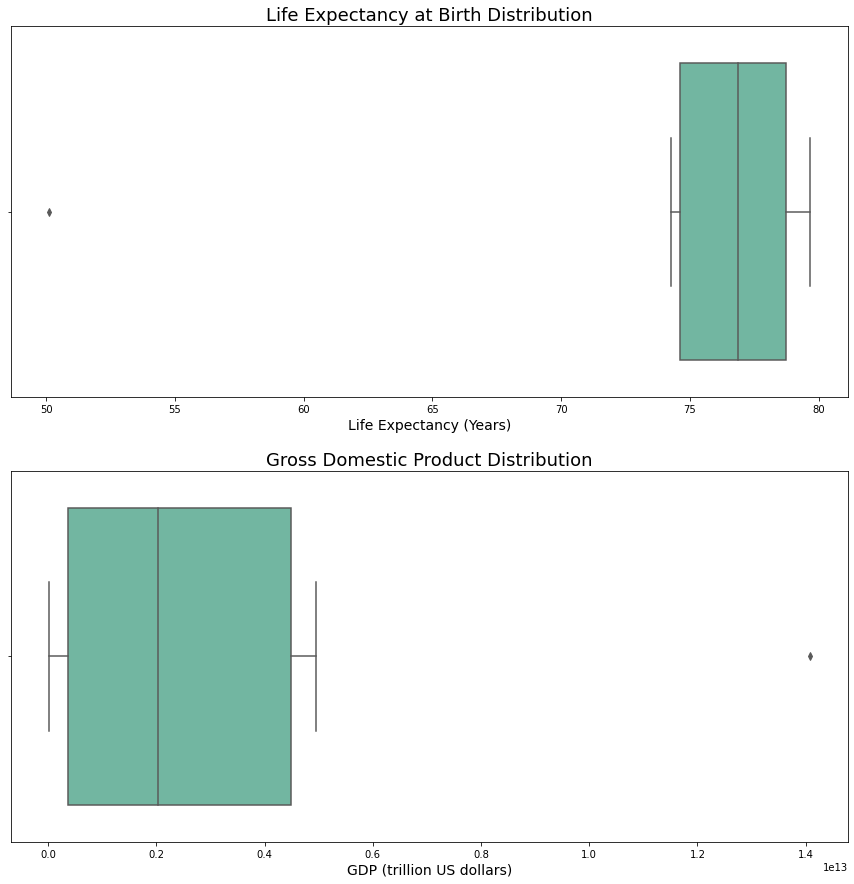

In [137]:
# What is the distribution of life expectancy?
plt.figure (figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x=data_grouped_country['Life expectancy at birth (years)'], palette='Set2')
plt.xlabel('Life Expectancy (Years)', size=14)
plt.title('Life Expectancy at Birth Distribution', loc='center', size=18)
# What is the distribution of GDP?
plt.subplot(2,1,2)
sns.boxplot(x=data_grouped_country['GDP'], palette='Set2')
plt.xlabel('GDP (trillion US dollars)', size=14)
plt.title('Gross Domestic Product Distribution', loc='center', size=18)
plt.savefig('figures\Life Expectancy & GDP Distribution.jpeg')
plt.show()

**Based on the plots we see one outlier for life expectancy (Zimbabwe), and the other outlier for GDP (USA). Median life expectancy is around 77 years. Median GDP is around 200 billion US dollars.**

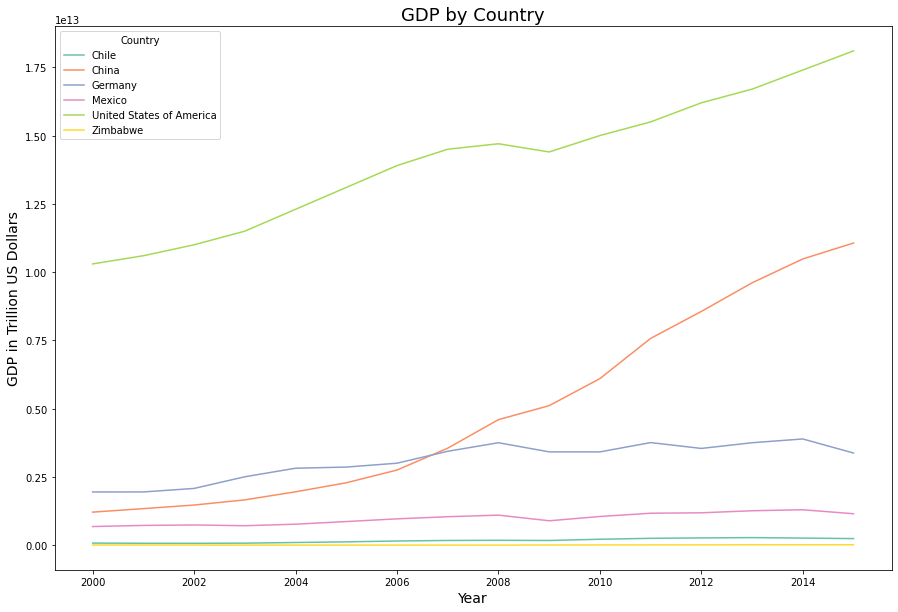

In [138]:
# Let's plot GDP by Country to answer the question whether GDP increased over time in the six nations
plt.figure (figsize=(15,10))
sns.lineplot(x=data['Year'],y=data['GDP'], hue=data['Country'], palette='Set2')
plt.xlabel('Year', size=14)
plt.ylabel('GDP in Trillion US Dollars', size=14)
plt.title('GDP by Country', loc='center', size=18)
plt.savefig('figures\GDP by Country.jpeg')
plt.show()

**Based on this plot there is a clear picture of GDP increase for USA and China but for smaller countries we can't make a conclusion. We can use log scale to identify the pattern.**

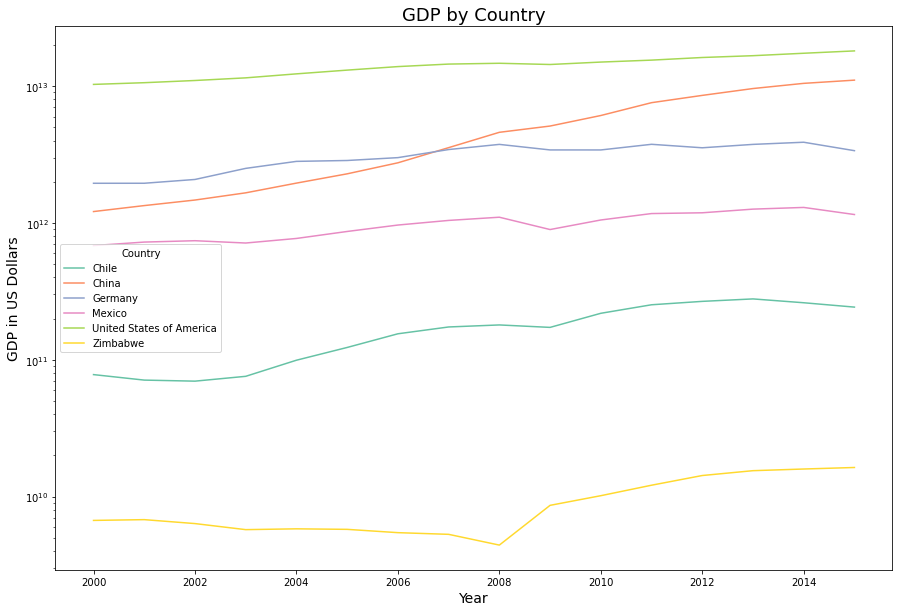

In [139]:
plt.figure (figsize=(15,10))
ax = plt.subplot(1,1,1)
sns.lineplot(x=data['Year'],y=data['GDP'], hue=data['Country'], palette='Set2')
ax.set_yscale('log')
plt.xlabel('Year', size=14)
plt.ylabel('GDP in US Dollars', size=14)
plt.title('GDP by Country', loc='center', size=18)
plt.savefig('figures\GDP by Country log scaled.jpeg')
plt.show()

**Now we can make a conclusion that GDP increased over time in all countries.**

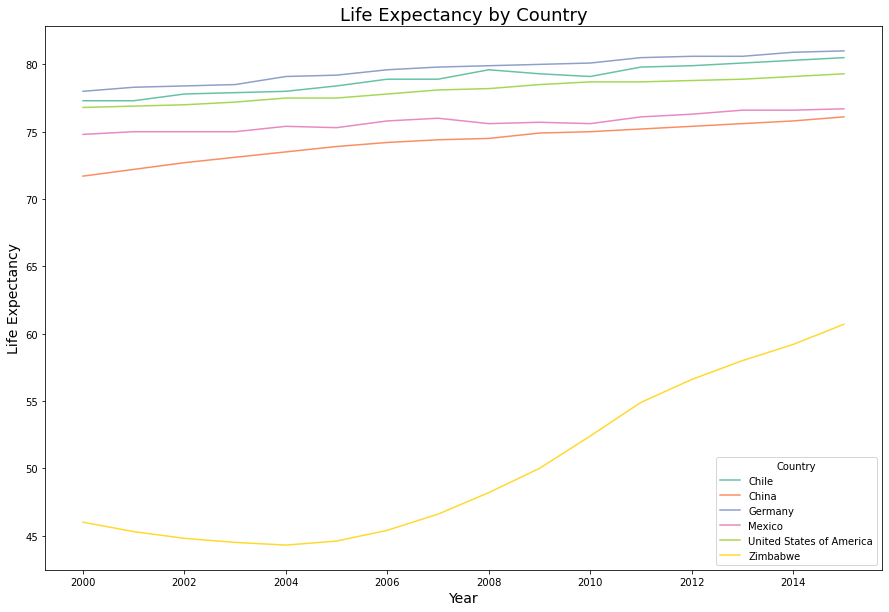

In [140]:
# Let's plot Life expectancy by Country to answer the question whether life expectancy increased over time in the six nations
plt.figure (figsize=(15,10))
sns.lineplot(x=data['Year'],y=data['Life expectancy at birth (years)'], hue=data['Country'], palette='Set2')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Life Expectancy by Country', loc='center', size=18)
plt.savefig('figures\Life expectancy by Country.jpeg')
plt.show()

**We can make a conclusion that life expectancy increased over time in all countries.**

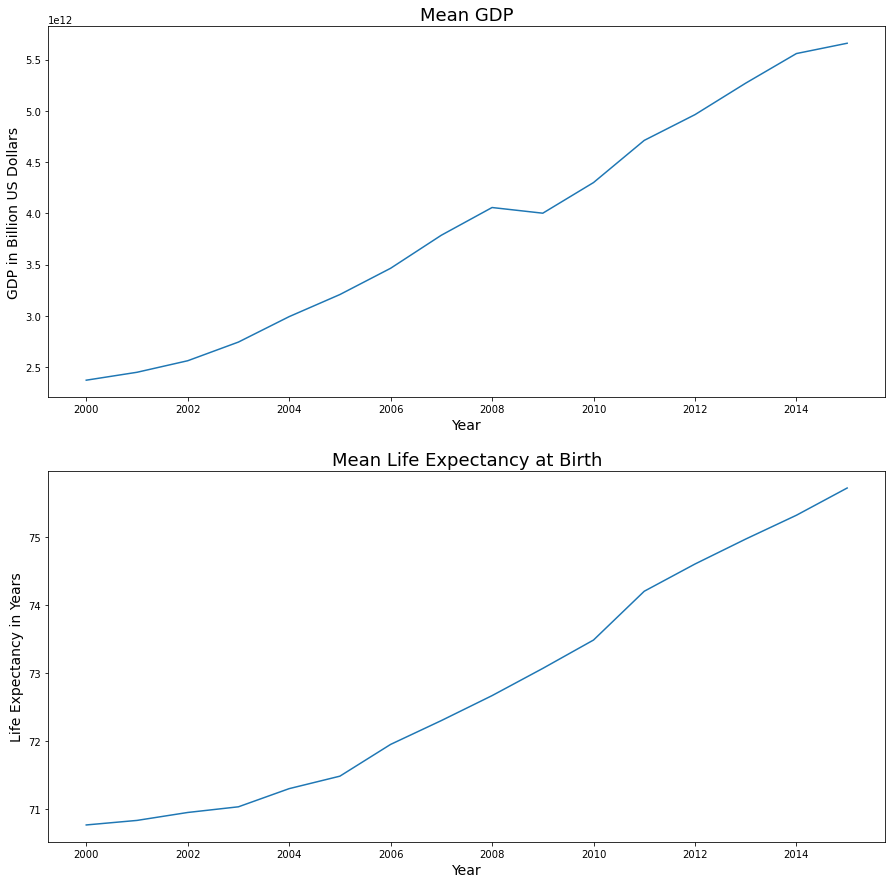

In [141]:
# Is there any trend for GDP and life expectancy over time in all countries?
plt.figure (figsize=(15,15))
plt.subplot(2,1,1)
plt.plot('Year', 'GDP', data=data_grouped_year)
plt.xlabel('Year', size=14)
plt.ylabel('GDP in Billion US Dollars', size=14)
plt.title('Mean GDP', loc='center', size=18)

plt.subplot(2,1,2)
plt.plot('Year', 'Life expectancy at birth (years)', data=data_grouped_year)
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy in Years', size=14)
plt.title('Mean Life Expectancy at Birth', loc='center', size=18)
plt.savefig('figures\Mean GDP and Life Expectancy.jpeg')
plt.show()

**We see increase of botn GDP and life expectancy over time.**

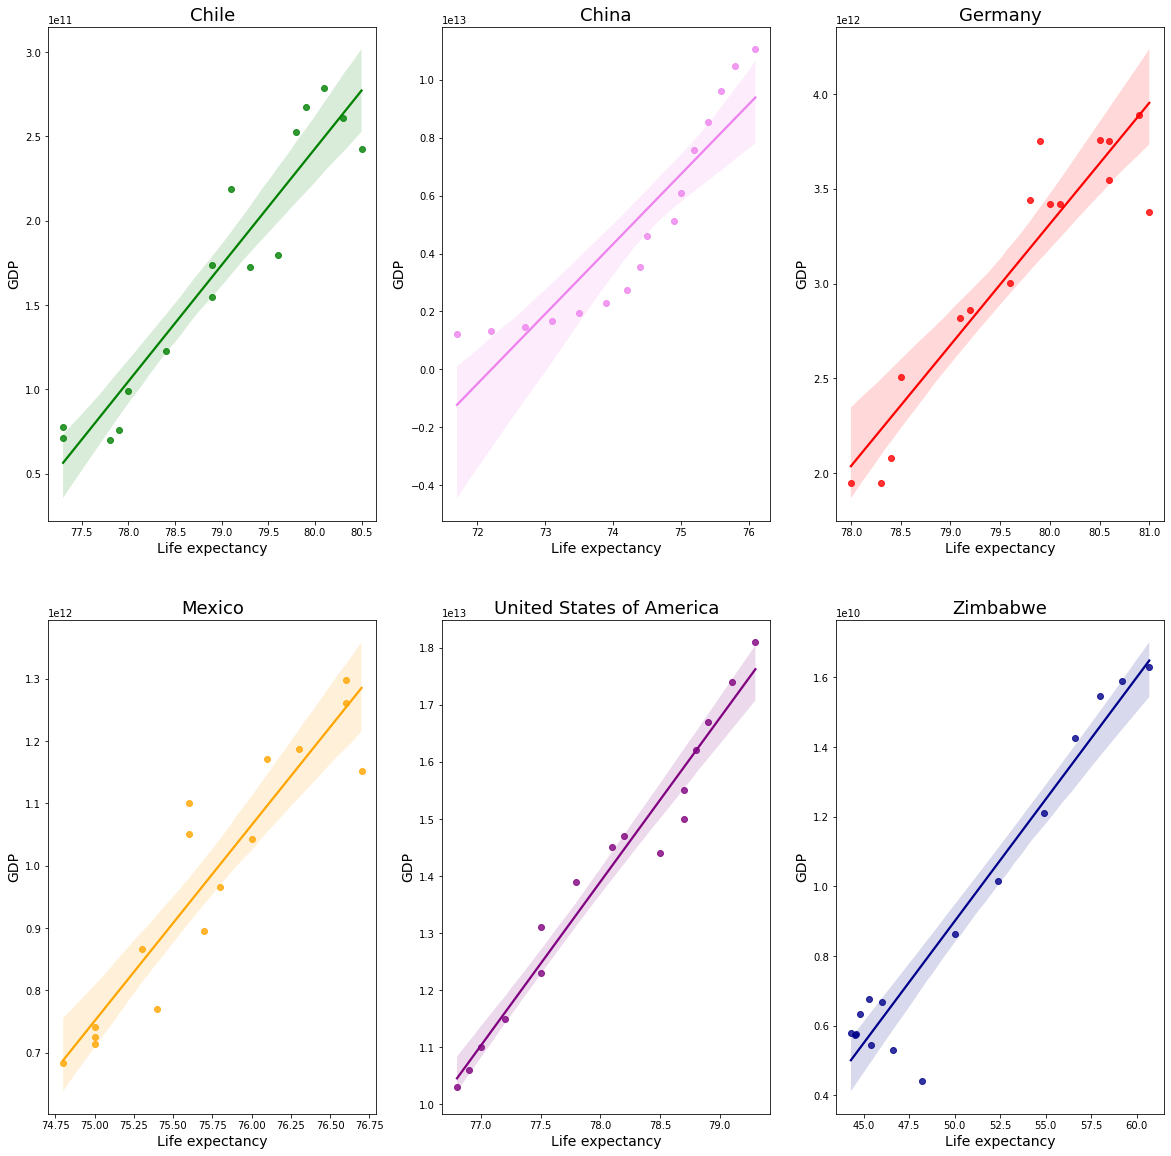

In [142]:
# Is there a correlation between GDP and life expectancy of a country?
plt.figure (figsize=(20,20))
plt.subplot(2,3,1)
sns.regplot(data = data[data['Country']=='Chile'], x='Life expectancy at birth (years)', y='GDP', color='green')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Chile', size=18)
plt.subplot(2,3,2)
sns.regplot(data = data[data['Country']=='China'], x='Life expectancy at birth (years)', y='GDP', color='violet')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('China', size=18)
plt.subplot(2,3,3)
sns.regplot(data = data[data['Country']=='Germany'], x='Life expectancy at birth (years)', y='GDP', color='red')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Germany', size=18)
plt.subplot(2,3,4)
sns.regplot(data = data[data['Country']=='Mexico'], x='Life expectancy at birth (years)', y='GDP', color='orange')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Mexico', size=18)
plt.subplot(2,3,5)
sns.regplot(data = data[data['Country']=='United States of America'], x='Life expectancy at birth (years)', y='GDP', color='purple')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('United States of America', size=18)
plt.subplot(2,3,6)
sns.regplot(data = data[data['Country']=='Zimbabwe'], x='Life expectancy at birth (years)', y='GDP', color='darkblue')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Zimbabwe', size=18)
plt.savefig('figures\Correlation between GDP and life expectancy.jpeg')
plt.show()

**We see that GDP and life expectancy are positively correlated.**